In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle


In [8]:
# cargar los dos sets de tweets en dataframes
df1 = pd.read_excel('ISIS_Twitter_clean.xlsx')
#df2 = pd.read_excel('randomClean.xlsx')

# agregar una columna 'tema' que identifique el tema de cada set de tweets
#df1['tema'] = 'terrorismo'
#df2['tema'] = 'otro'

# concatenar los dataframes
#df = pd.concat([df1, df2])

print(df1.head())  # debug
print(df1.tail())  # debug

# dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df1['Contenido'].values.astype(str), df1['label'], test_size=0.2, random_state=42)


# crear un vectorizador Tfidf para convertir el texto a vectores numéricos
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# crear un modelo de regresión logística
model = LogisticRegression()

# entrenar el modelo con los datos de entrenamiento
model.fit(X_train_vec, y_train)

# predecir los temas de los tweets de prueba
y_pred = model.predict(X_test_vec)

# evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('\n ---------------------------------------- \nPrecisión del modelo:', accuracy)

# # Guardar el modelo en un archivo 'model.pkl'
# with open('model.pkl', 'wb') as model_file:
#     pickle.dump(model, model_file)

# # Guardar el vectorizador en un archivo 'vectorizer.pkl'
# with open('vectorizer.pkl', 'wb') as vectorizer_file:
#     pickle.dump(vectorizer, vectorizer_file)


       Fecha       Usuario Displayed name  \
0 2016-07-04      Yara_Ari   يارا العريفي   
1 2016-07-04   PansyHunks1    Pansy Hunks   
2 2016-07-04  farhan_fyzee   Farhan Fyzee   
3 2016-07-04    cydasalleh       Rashidah   
4 2016-07-04     Zolo_san1     حسن العمري   

                                           Contenido label  
0  isisisnotislam wake people literally killing u...     N  
1  rt revealed isi occupies church christian face...     N  
2  rt isi claim defend islam yet attack resting p...     N  
3  rt isi bombed mosque nd holiest city islam hol...     N  
4  rt dude isi bombing muslim people muslim commu...     N  
          Fecha         Usuario Displayed name  \
6772 2016-07-04  hishamdanielll         ✩хишам   
6773 2016-07-04     shakeelaa_a         Shaku❤   
6774 2016-07-04        TonyFrra          9-Mar   
6775 2016-07-04         Paology            dhi   
6776 2016-07-04      ClayFakiha           Clay   

                                              Contenido label 

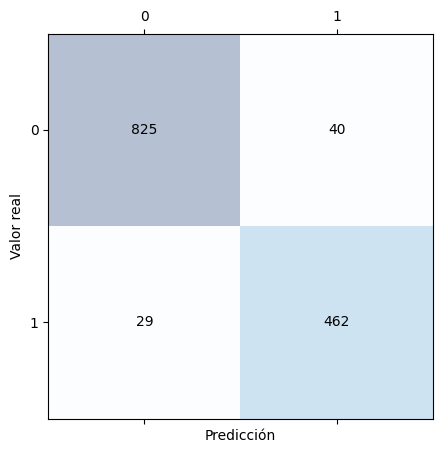

In [9]:
# VISUALIZAMOS LA MATRIZ DE CONFUSIÓN
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Matriz de confusión
fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
cm = confusion_matrix(y_test, y_pred)
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()



In [10]:
#### ESTA FUNCIÓN HA SIDO YA IMPLEMENTADA EN EL FICHERO PROTOTIPO ####
# SOLO PARA DEBUGGING #

def clasificar_tweets(lista_tweets):
    # crear vectores numéricos a partir del texto de los tweets
    lista_vec = vectorizer.transform(lista_tweets)

    # hacer predicciones de la clase de los tweets
    predicciones = model.predict(lista_vec)

    # identificar cuáles tweets son de la categoría "es_terrorismo"
    es_terrorismo = predicciones == 'N'

    # devolver los tweets clasificados como "terrorismo"
    return [t for i, t in enumerate(lista_tweets) if es_terrorismo[i]]

tweets = pd.read_excel("randomClean.xlsx")
print(len(tweets))
tweets = tweets['Contenido'].values.astype(str)
tweets_terrorismo = clasificar_tweets(tweets)
print(len(tweets_terrorismo))

for i, tweet in enumerate(tweets_terrorismo, start=1):
    print(f"{i}. {tweet}")


5000
129
1. arent many womeninstem would think
2. hahahahahahahahahahahaha dont listen hate gary vagina ringing wet rn
3. dont hate bingcry
4. hate white people
5. el chiste del dia posted photo twitter
6. many people playin starcraft world
7. know polarizing personality people either love hate
8. facetimes hey whatcha told im oh god bye
9. trumplets support trump united state america apparently
10. kill
11. walmart irritating as place
12. grifter gon na grift
13. hate
14. year conviction freedom rider sala udin pardoned obama
15. let ride around city
16. neither really saying something
17. limbaugh obama create unrest every time trump act shut u hypocritical junky
18. hahahaha im gon na try
19. girlie hellz na like litto gpa already
20. really hate people look im witch force religion mefuck
21. vull el xbox one
22. raider r gon na go way u guy jraider forever
23. le two week cruise
24. passed final
25. man mf
26. lol dont even recognize place
27. never wrote im dead focused man turn e